# Dresses Attribute Sales Data Set

This dataset contain Attributes of dresses and their recommendations according to their sales. Sales are monitor on the basis of alternate days.


[Source](https://archive.ics.uci.edu/ml/datasets/Dresses_Attribute_Sales)


In [15]:
# %reset # clear the variables in Ipyton
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle                                # For serializing and de-serializing Python objects
import os
import json                                  # For encoding and decoding JSON data
from sklearn.datasets.base import Bunch
from sklearn.preprocessing import Imputer, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

import seaborn as sns                        # Statistical visualization library based on Matplotlib

os.chdir('C:\Users\Hien\Documents\working_projects\MLproject_dresses_sales')

In [16]:
# Load and clean data
# Data about dress
dressdata = pd.read_excel('data/DressSales.xlsx',sheetname=0, header=0)
dressdata.ix[0:5,1:24] # first five rows

def convert(c):
    if type(c).__name__ == "unicode": return c
    return c.strftime("%d/%m/%Y")

dressdata = \
dressdata.rename(columns=lambda c: 
        c if type(c).__name__ == "unicode" else c.strftime("%d/%m/%Y") 
    )
                
dressfeatures = pd.read_excel('data/AttributeDataSet.xlsx',sheetname=0,header=0)

def firstcap():
    global dressfeatures
    
    dressfeatures = dressfeatures.rename(columns={"waiseline":"WaistLine"})
    dressfeatures = dressfeatures.rename(columns={"Pattern Type":"PatternType"})
    
    for y in dressfeatures.columns:     
        x = np.unique(dressfeatures[y].values)
        for i in x:
            dressfeatures[y][dressfeatures[y]==i]=str(i).title()
firstcap()

def remove_nulls():
    """ Replace "Null" with np.nan """
    global dressfeatures
    
    for c in ['Decoration', 'FabricType', 'Material', 'PatternType', 'WaistLine']:
        dressfeatures[c][dressfeatures[c]=='Null'] = np.nan
remove_nulls()

def fix_spelling():
    def rename(c, bad, good):
        dressfeatures[c][dressfeatures[c]==bad]=good
    
    c = 'FabricType'
    for bad,good in [
            ('Flannael', 'Flannel'),
            ('Knitting', 'Knitted'),
            ('Sattin', 'Satin'),
            ('Wollen', 'Woolen'),
               ]:
        rename(c, bad, good)
        
    c = 'Material'
    for bad,good in [
            ('Model', 'Modal'),
            ('Sill', 'Silk'),
               ]:
        rename(c, bad, good)
        
    c = 'NeckLine'
    for bad,good in [
            ('Mandarin-Collor', 'Mandarin-Collar'),
            ('Peterpan-Collor', 'Peterpan-Collar'),
            ('Sqare-Collor', 'Square-Collar'),
            ('Turndowncollor', 'Turndowncollar'),
               ]:
        rename(c, bad, good)
        
    c = 'PatternType'
    for bad,good in [
            ('Leapord', 'Leopard'),
               ]:
        rename(c, bad, good)
    
    c = 'Season'
    for bad,good in [
            ('Automn', 'Autumn'),
               ]:
        rename(c, bad, good)

    c = 'Size'
    for bad,good in [
            ('Small', 'S'),
            ('Xl', 'XL'),
               ]:
        rename(c, bad, good)
    
    c = 'SleeveLength'
    for bad,good in [
            ('Cap-Sleeves', 'Capsleeves'),
            ('Half',        'Halfsleeves'),
            ('Halfsleeve',  'Halfsleeves'),
            ('Sleeevless',  'Sleeveless'),
            ('Sleevless',   'Sleeveless'),
            ('Sleveless',   'Sleeveless'),
            ('Threequater', 'Threequarter'),
            ('Thressqatar', 'Threequarter'),
            ('Turndowncollor',  'Turndowncollar'),
            ('Urndowncollor',   'Turndowncollar'),
               ]:
        rename(c, bad, good)   
fix_spelling()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Sales of 5 best products

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 25 but corresponding boolean dimension is 23


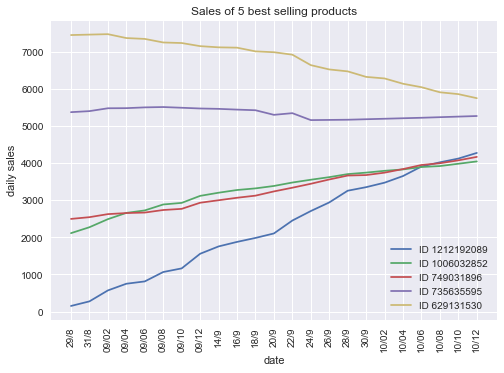

In [17]:
# Exploring the data
# ----------------

# Organizing data
# -----------
def read_cols(data):
    cols = {i for i in data.columns}
    return cols

# Plot the 5 products with the best sales
dressdata.shape
dressdata['sumsales']=dressdata.ix[:,1:-1].sum(axis=1)
x = dressdata['sumsales'].sort_values()
best5 = dressdata.ix[x[-5:].keys(),:]
worst5 = dressdata.ix[x[0:5].keys(),:]

def plot5best():
    best5_1=best5.ix[best5.index[0],:]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    xis = np.arange(1,len(best5_1)+1)
    bb = [best5.ix[n,1:-1].values for n in best5.index]
    # Deal with nan values
    # plt.plot(xis,b1,xis,b2,xis,b3,xis,b4,xis,b5) 
    B = np.array(bb).astype(np.double)
    mask = np.isfinite(B)
    labels = best5.ix[:,0]
    labels1 = ['ID '+str(labels[n]) for n in best5.index]
    for i in np.arange(0,5):
        plt.plot(xis[mask[i]],bb[i][mask[i]],label = labels1[i])
    kk = best5_1.ix[1:-1].keys()
    kk_noyear = [d[0:-5] for d in kk] # Remove years (e.g. '/2013')
    ax.set_xticks(np.arange(1,len(kk_noyear)+1))
    ax.set_xticklabels(kk_noyear, rotation=90, fontsize='small')
    labels1 = str(best5.ix[:,0])
    ax.set_xlabel('date')
    ax.set_ylabel('daily sales')
    plt.title('Sales of 5 best selling products')
    ax.legend(loc='best')
    plt.show()
plot5best()

## Sales of the most popular styles of dress

Styles are:
Bohemian
Brief
Casual
Cute
Fashion
Flare
Novelty
Ol
Party
Sexy
Vintage
Work


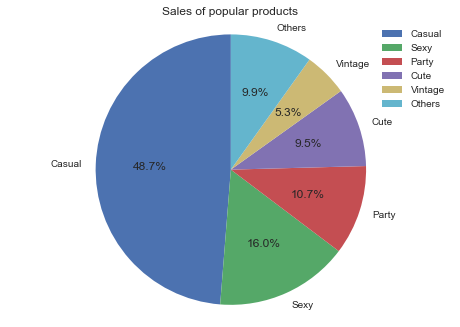

In [18]:
# Plot the style: pie-chart
# Group 5 main style and others
#dressfeatures['Style'][dressfeatures['Style']=='sexy']='Sexy'
# Make first letter capital
def plot5pop():
    x = np.unique(dressfeatures['Style'].values)
    for i in x:
        dressfeatures['Style'][dressfeatures['Style']==i]=str(i).title()
    # print out the styles
    x = np.unique(dressfeatures['Style'].values)
    print('Styles are:')
    for i in x:
        print i
    # 
    grouped_style = dressfeatures.groupby(['Style'])
    cnt_grouped_style = grouped_style['Dress_ID'].count()
    cnt_grouped_style.sort_values(ascending=False, inplace=True)
    
    # Pick 5 most popular styles and combine the others as others
    list5style_labels = ['Casual', 'Sexy', 'Party', 'Cute', 'Vintage',
                  'Others']
    valuepopular5 = cnt_grouped_style[:5]
    valuepopular5['Others']=cnt_grouped_style.values[6:].sum()
    fig1, ax1 = plt.subplots()
    ax1.pie(valuepopular5.values, labels = list5style_labels, 
            autopct ='%1.1f%%',shadow=False,startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Sales of popular products')
    ax1.legend(loc='best')
    plt.show()
    
plot5pop()

# Percentages of 'Recommendation' for different styles and price levels

In [19]:
def recommended():
    #Create a table with groups according to styles, price, and recommendation
    # Change the type of the "Recommendation" column into numeric type
    dressfeatures['Recommendation_int']=pd.to_numeric(dressfeatures['Recommendation'])
    # Make first letter capital
    x = np.unique(dressfeatures['Price'].values)
    for i in x:
        dressfeatures['Price'][dressfeatures['Price']==i]=str(i).title()
            
    cnt_grouped_all = dressfeatures.groupby(['Style','Price'])
    cnt_count = cnt_grouped_all['Recommendation_int'].sum()
    print('In absolute values:')
    print('------------------')
    print(cnt_count.unstack())
    cnt_count_percent = (cnt_count*100)/ dressfeatures['Recommendation_int'].sum()
    print('In percentage:')
    print('-------------')
    print(cnt_count_percent.unstack())
recommended()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In absolute values:
------------------
Price     Average  High   Low  Medium  Very-High
Style                                           
Bohemian      3.0   NaN   8.0     1.0        1.0
Brief         4.0   NaN   0.0     NaN        NaN
Casual       42.0   4.0  34.0     8.0        1.0
Cute          8.0   2.0   8.0     4.0        NaN
Fashion       0.0   NaN   NaN     NaN        NaN
Flare         1.0   NaN   NaN     NaN        NaN
Novelty       2.0   NaN   NaN     1.0        NaN
Ol            NaN   NaN   NaN     0.0        NaN
Party        12.0   3.0   NaN     4.0       14.0
Sexy         11.0   0.0  21.0     0.0        0.0
Vintage       6.0   0.0   1.0     1.0        NaN
Work          3.0   NaN   0.0     0.0        NaN
In percentage:
-------------
Price       Average      High        Low    Medium  Very-High
Style                                                        
Bohemian   1.428571       NaN   3.809524  0.476190   0.476190
Brief      1.904762       NaN   0.000000       NaN        Na

## Mangage the data for modelling

In [20]:
## Manage the data for modelling
# -----------------------------
# Organize the data

# Drop the irrelevant features
dressfeatures_data = dressfeatures.copy()
dressfeatures_data.drop('Dress_ID', axis=1, inplace=True)
dressfeatures_data.drop('Rating', axis=1, inplace=True) # Missing and doesn't make sense
dressfeatures_data.drop('Size', axis=1, inplace=True) # irrelevant
dressfeatures_data.drop('Recommendation_int', axis=1, inplace=True) # irrelevant

# Change the missing values in columns into "Unknown": don't use impution with these columns
def fix_nan_values():
    def rename(c):
        dressfeatures_data[c][dressfeatures_data[c].isnull()]= "Unknown"
    
    clist = ['WaistLine','Material','FabricType','Decoration','PatternType']
    for c in clist:
        rename(c)
        
fix_nan_values()

# Create a meta and save in the folder

def write_meta_json():
    meta = {
            'target_names': sorted(list(str(n) for n in dressfeatures_data.Recommendation.unique())),
            'feature_names': sorted(list(dressfeatures_data.columns)),
            'categorical_features': {
                    c: sorted(list(dressfeatures_data[c].unique()))
                    for c in dressfeatures_data.columns
                    if dressfeatures_data[c].dtype == 'object'
                    },
            }
    meta_file = 'data/meta.json'
    with open(meta_file,'w') as f:
        json.dump(meta, f, indent=2, sort_keys=True)
    print('Wrote %s'%meta_file)
    
write_meta_json()

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dressfeatures_data, 
            dressfeatures_data['Recommendation'], 
            stratify=dressfeatures_data['Recommendation'], test_size=0.025, random_state=42)

# Use the function to load the data 
def load_data(root='C:/Users/Hien/Documents/working_projects/MLproject_dresses_sales/data'):
    # Load the meta data from the file
    with open(os.path.join(root, 'meta.json'), 'r') as f:
        meta = json.load(f)

    names = meta['feature_names']

    # Load the readme information
    with open(os.path.join(root, 'README.md'), 'r') as f:
        readme = f.read()

    # Load the training and test data, skipping the bad row in the test data
    train = X_train
    test = X_test
    
    # Remove the target from the categorical features
    meta['categorical_features'].pop('Recommendation')

    # Return the bunch with the appropriate data chunked apart
    return Bunch(
        data = train.drop('Recommendation',axis=1,inplace=False),
        target = train['Recommendation'],
        data_test = test.drop('Recommendation',axis=1,inplace=False),
        target_test = test['Recommendation'],
        target_names = meta['target_names'],
        feature_names = meta['feature_names'],
        categorical_features = meta['categorical_features'],
        DESCR = readme,
    )
    
# Load the data
dress_data = load_data()

# Encode the data
from sklearn.preprocessing import Imputer, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """
    def __init__(self, columns=None):
        self.columns  = columns
        self.encoders = None

    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns

        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns
        }
        return self

    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])

        return output
    
encoder = EncodeCategorical(dress_data.categorical_features.keys())
dress_data_encoded = encoder.fit_transform(dress_data.data)

# Imputation
class ImputeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """

    def __init__(self, columns=None):
        self.columns = columns
        self.imputer = None

    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to impute.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns

        # Fit an imputer for each column in the data frame
        self.imputer = Imputer(missing_values=0, strategy='most_frequent')
        self.imputer.fit(data[self.columns])

        return self

    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        output[self.columns] = self.imputer.transform(output[self.columns])
        return output
    
imputer = ImputeCategorical(['Season', 'NeckLine', 'SleeveLength'])
data_impt = imputer.fit_transform(dress_data_encoded)

Wrote data/meta.json


C:\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:259: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return aux[:-1][aux[1:] == aux[:-1]]


## Build the model

In [21]:
## Build the model
# ---------------

# Need to encode our target data as well
yencode = LabelEncoder().fit(dress_data.target)

# Construct the pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

dress_sales = Pipeline([
        ('encoder',  EncodeCategorical(dress_data.categorical_features.keys())),
        ('imputer', ImputeCategorical(['Season', 'NeckLine', 'SleeveLength'])),
        ('classifier', LogisticRegression())
    ])

# Fit the pipeline
dress_sales.fit(dress_data.data, yencode.transform(dress_data.target))

# encode test targets
y_true = yencode.transform([y for y in dress_data.target_test])

# use the model to get the predicted value
y_pred = dress_sales.predict(dress_data.data_test)

# Classification report
from sklearn.metrics import classification_report

# execute classification report
print classification_report(y_true, y_pred, target_names=dress_data.target_names)

# save the model to disk for reuse later, using pickle module
path1 = 'C:/Users/Hien/Documents/working_projects/MLproject_dresses_sales/data'
def dump_model(model, path = path1 , name='classifier.pickle'):
    with open(os.path.join(path, name), 'wb') as f:
        pickle.dump(model, f)

dump_model(dress_sales)

             precision    recall  f1-score   support

          0       0.67      1.00      0.80         8
          1       1.00      0.20      0.33         5

avg / total       0.79      0.69      0.62        13



# Operate the model

In [22]:
# Model operation
# ---------------
path2 = 'C:/Users/Hien/Documents/working_projects/MLproject_dresses_sales/data/classifier.pickle'
def load_model(path=path2):
    with open(path, 'rb') as f:
        return pickle.load(f)

def predict(model, meta=dress_data):
    data = {} # Store the input from the user

    for column in meta['feature_names'][:-1]:
        # We cheat and use the mean value for the weighting category, figuring
        # that most users won't know what theirs is.
        if column == 'fnlwgt':
            data[column] = 189778
        else:
            # Get the valid responses
            valid = meta['categorical_features'].get(column)

            # Prompt the user for an answer until good
            while True:
                val = " " + raw_input("enter {} >".format(column))
                if valid and val not in valid:
                    print "Not valid, choose one of {}".format(valid)
                else:
                    data[column] = val
                    break

    # Create prediction and label
    yhat = model.predict(pd.DataFrame([data]))
    print "We predict that you make %s" % yencode.inverse_transform(yhat)[0]
    
def ppredict(model, meta=dress_data,
             Style='Brief',
             Price='Average',
             Season='Winter',
             NeckLine='O-Neck',
             SleeveLength='Full',
             WaistLine='Natural',
             Material='Mix',
             FabricType='Unknown',
             Decoration = 'Sashes',
             PatternType = 'Solid'
             ):
    data = {
        'Style': Style,
        'Price':Price,
        'Season':Season,
        'NeckLine':NeckLine,
        'SleeveLength':SleeveLength,
        'WaistLine':WaistLine,
        'Material':Material,
        'FabricType':FabricType,
        'Decoration':Decoration,
        'PatternType':PatternType,
    }

    # Create prediction and label
    yhat = model.predict(pd.DataFrame([data]))
    result = yencode.inverse_transform(yhat)[0]
    if result == 1:      
        print "We predict that the product is recommended"
    else:
        print "We predict that the product is not recommended"
    
def valid(column):
    val = meta['categorical_features'].get(column)
    return val
    
print '-----------------------------------------------------------------'

# Execute the interface
model = load_model()
#predict(model)
ppredict(model,dress_data)

-----------------------------------------------------------------
We predict that the product is not recommended
